<a href="https://colab.research.google.com/github/Sheha1218/Tea-leaf-disease-detection-system./blob/main/Tea_Leaf_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import opendatasets as od


In [ ]:

tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
od.download('https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shehangunathilaka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs


100%|██████████| 740M/740M [00:06<00:00, 119MB/s] 


In [ ]:
data_dir=('/content/identifying-disease-in-tea-leafs/tea sickness dataset')

In [ ]:
Batch_size=8
Image_size=(224,224)

In [ ]:
data=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                 batch_size=Batch_size,
                                                 image_size=Image_size,
                                                 subset='training',
                                                 validation_split=0.1,
                                                 seed=42)

validation_data=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                     batch_size=Batch_size,
                                                     image_size=Image_size,
                                                     subset='validation',
                                                    validation_split=0.1,
                                                     seed=42)

Found 885 files belonging to 8 classes.
Using 797 files for training.
Found 885 files belonging to 8 classes.
Using 88 files for validation.


In [ ]:
cls_name=data.class_names
cls_name

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [ ]:
for image_batch,label_batch in data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(8, 224, 224, 3)
(8,)


In [ ]:
data=data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))

In [ ]:
data=data.map(lambda x,y:(x,tf.one_hot(y,depth=8)))
validation_data=validation_data.map(lambda x, y: (x, tf.one_hot(y, depth=8)))

In [ ]:
for image_batch in data.take(1):
  print(image_batch)



(<tf.Tensor: shape=(8, 224, 224, 3), dtype=float32, numpy=
array([[[[0.13967587, 0.18775511, 0.14667867],
         [0.16606642, 0.2052821 , 0.17136855],
         [0.22991197, 0.2610644 , 0.21858743],
         ...,
         [0.6260097 , 0.86914694, 0.9514999 ],
         [0.60588205, 0.84539783, 0.92775077],
         [0.64864033, 0.859744  , 0.9555431 ]],

        [[0.15744299, 0.20842338, 0.1809724 ],
         [0.1777711 , 0.21306522, 0.19345738],
         [0.21494599, 0.24239697, 0.21494599],
         ...,
         [0.6020408 , 0.8451781 , 0.9353742 ],
         [0.62779146, 0.8562428 , 0.9503604 ],
         [0.6604838 , 0.8602437 , 0.9641446 ]],

        [[0.19877951, 0.2497599 , 0.21054421],
         [0.19057623, 0.23763506, 0.19841936],
         [0.19579832, 0.24285716, 0.20364146],
         ...,
         [0.5965988 , 0.85150075, 0.93777525],
         [0.61874783, 0.86188513, 0.95992434],
         [0.6344934 , 0.86026317, 0.9535402 ]],

        ...,

        [[0.48593467, 0.7119851 ,

In [ ]:
data_Augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomHeight(0.25),
    tf.keras.layers.RandomWidth(0.25),
    tf.keras.layers.RandomHue(0.2)
])


In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Input(shape=(224, 224, 3)))


model.add(data_Augmentation)


model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())


model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.GlobalAveragePooling2D())




model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))


model.add(tf.keras.layers.Dense(8, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, None, None, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, None, None, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, None, None, 64)      │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, None, None, 128)     │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,688 (576.91 KB)

 Trainable params: 147,432 (575.91 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(data,
                    epochs=70,
                    validation_data=validation_data)


Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 441ms/step - accuracy: 0.2682 - loss: 1.7816 - val_accuracy: 0.2045 - val_loss: 1.7778
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 393ms/step - accuracy: 0.3505 - loss: 1.3647 - val_accuracy: 0.4091 - val_loss: 1.3236
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - accuracy: 0.3658 - loss: 1.3082 - val_accuracy: 0.2159 - val_loss: 2.3875
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 424ms/step - accuracy: 0.3667 - loss: 1.2965 - val_accuracy: 0.1705 - val_loss: 3.7219
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 397ms/step - accuracy: 0.3566 - loss: 1.3560 - val_accuracy: 0.0909 - val_loss: 14.1398
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 377ms/step - accuracy: 0.3719 - loss: 1.2478 - val_accuracy: 0.3295 - val_loss: 1.4668
Epoch 7/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 365ms/step - accuracy: 0.3965 - loss: 1.2982 - val_accuracy: 0.1818 - val_loss: 4.3028
Epoch 8/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 338ms/step - accuracy: 0.3911 - loss: 

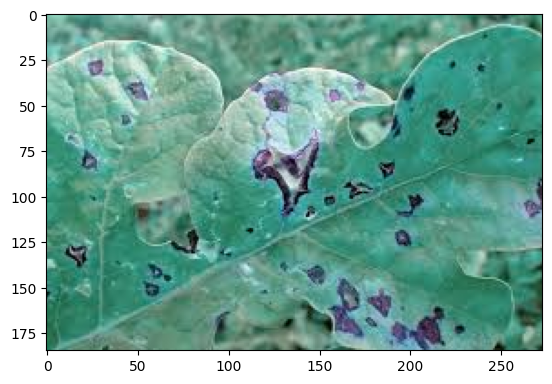

In [ ]:
img=cv.imread('/content/download.jpeg')
plt.imshow(img)
plt.show()

In [ ]:
resize=tf.image.resize(img,(224,244))
scaled_img=resize/255



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[1.3034683e-25, 1.1615101e-19, 1.4482726e-25, 2.2690122e-28,
        6.5832099e-28, 1.0000000e+00, 6.3350007e-12, 7.5164097e-25]],
      dtype=float32)

In [ ]:
np.expand_dims(scaled_img,0).shape

(1, 224, 244, 3)

In [ ]:
scaled_img

<tf.Tensor: shape=(224, 244, 3), dtype=float32, numpy=
array([[[0.503359  , 0.7661041 , 0.68375117],
        [0.5310832 , 0.7938283 , 0.7114754 ],
        [0.5650193 , 0.8277644 , 0.74541146],
        ...,
        [0.2644493 , 0.5585669 , 0.47229242],
        [0.31387797, 0.60155076, 0.51527625],
        [0.34001142, 0.5857118 , 0.49943727]],

       [[0.48852763, 0.7512727 , 0.66891974],
        [0.51028484, 0.7730299 , 0.690677  ],
        [0.54184   , 0.8045851 , 0.72223216],
        ...,
        [0.2615519 , 0.5548087 , 0.4668124 ],
        [0.3181231 , 0.603415  , 0.51475966],
        [0.35125673, 0.60223544, 0.5157888 ]],

       [[0.47429496, 0.73261076, 0.6502578 ],
        [0.4906755 , 0.7489914 , 0.66663843],
        [0.5146136 , 0.77292943, 0.6905765 ],
        ...,
        [0.25568107, 0.5464189 , 0.45338476],
        [0.3210486 , 0.60692394, 0.511178  ],
        [0.36577848, 0.62708676, 0.5339353 ]],

       ...,

       [[0.12180167, 0.4758521 , 0.3421427 ],
        [0.13

In [ ]:
history.history

{'accuracy': [0.28732746839523315,
  0.3500627279281616,
  0.3437892198562622,
  0.3676286041736603,
  0.37139272689819336,
  0.36511918902397156,
  0.4115432798862457,
  0.38143035769462585,
  0.3864491879940033,
  0.41405269503593445,
  0.4316185712814331,
  0.40777915716171265,
  0.44040149450302124,
  0.44918444752693176,
  0.42283564805984497,
  0.44040149450302124,
  0.42659974098205566,
  0.4642409086227417,
  0.4767879545688629,
  0.5031367540359497,
  0.4742785394191742,
  0.537013828754425,
  0.47553324699401855,
  0.5119196772575378,
  0.5043914914131165,
  0.4604767858982086,
  0.4905897080898285,
  0.538268506526947,
  0.49184441566467285,
  0.5018820762634277,
  0.537013828754425,
  0.5119196772575378,
  0.4905897080898285,
  0.5244667530059814,
  0.539523184299469,
  0.5081555843353271,
  0.519447922706604,
  0.4905897080898285,
  0.5332496762275696,
  0.4667503237724304,
  0.45922207832336426,
  0.4930991232395172,
  0.5169385075569153,
  0.5445420145988464,
  0.5207026

In [ ]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()

In [ ]:
for batch in validation_data.as_numpy_iterator():
  x,y=batch
  y_h=model.predict(x)
  precision.update_state(y,y_h)
  recall.update_state(y,y_h)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0941176488995552>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.09090909361839294>

In [ ]:
y_hat=model.predict(np.expand_dims(scaled_img,0))
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[1.3034683e-25, 1.1615101e-19, 1.4482726e-25, 2.2690122e-28,
        6.5832099e-28, 1.0000000e+00, 6.3350007e-12, 7.5164097e-25]],
      dtype=float32)

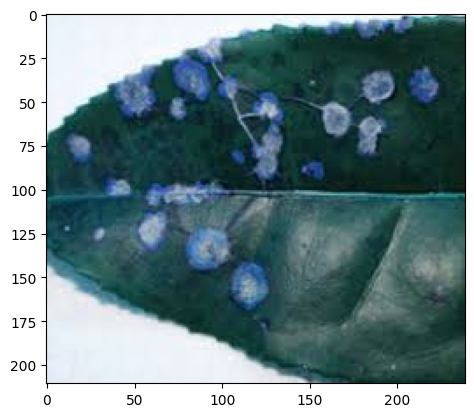

In [ ]:
img1=cv.imread('/content/download (1).jpeg')
plt.imshow(img1)
plt.show()

In [ ]:
resize=tf.image.resize(img,(224,244))
scaled_img=resize/255

In [ ]:
np.expand_dims(scaled_img,0)

NameError: name 'np' is not defined

In [ ]:
y_hat=model.predict(
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.3034683e-25, 1.1615101e-19, 1.4482726e-25, 2.2690122e-28,
        6.5832099e-28, 1.0000000e+00, 6.3350007e-12, 7.5164097e-25]],
      dtype=float32)

In [ ]:
model.save('new_model.h5')